In [4]:
import pandas as pd
import numpy as np


# Carregando e processando os dados

In [46]:
df_tv_shows = pd.read_csv('tvshowsfinals.csv')
df_tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2006 non-null   object 
 1   changed_network           2006 non-null   float64
 2   status                    1342 non-null   object 
 3   tv_network                2006 non-null   object 
 4   metacritc_last_info_year  2006 non-null   int64  
 5   tvtime_followers          2006 non-null   float64
 6   tvtime_rate               2006 non-null   float64
 7   no_seasons                1337 non-null   float64
 8   eps_duration              2006 non-null   object 
 9   age_rating                828 non-null    object 
 10  imdb_rate                 2006 non-null   float64
 11  rotten_tomatoes_rate      2006 non-null   float64
 12  released_year             945 non-null    float64
 13  awards_won                2006 non-null   float64
 14  awards_n

## Removendo dados sem status

In [47]:
df_tv_shows_clean = df_tv_shows[~df_tv_shows['status'].isnull()] 
# df_tv_shows_clean = df_tv_shows[~df_tv_shows['no_seasons'].isnull()] 
df_tv_shows_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 2005
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1342 non-null   object 
 1   changed_network           1342 non-null   float64
 2   status                    1342 non-null   object 
 3   tv_network                1342 non-null   object 
 4   metacritc_last_info_year  1342 non-null   int64  
 5   tvtime_followers          1342 non-null   float64
 6   tvtime_rate               1342 non-null   float64
 7   no_seasons                1046 non-null   float64
 8   eps_duration              1342 non-null   object 
 9   age_rating                643 non-null    object 
 10  imdb_rate                 1342 non-null   float64
 11  rotten_tomatoes_rate      1342 non-null   float64
 12  released_year             689 non-null    float64
 13  awards_won                1342 non-null   float64
 14  awards_n

## Computando dummies para dados categoricos

In [48]:
df_eps_duration_dummies = pd.get_dummies(df_tv_shows_clean['eps_duration'], prefix='duration')
df_network_dummies = pd.get_dummies(df_tv_shows_clean['tv_network'])
print(df_eps_duration_dummies.head())
df_network_dummies.head()

   duration_long  duration_normal  duration_short
0              0                1               0
2              0                1               0
5              0                1               0
6              0                1               0
7              0                1               0


,ABC,AMAZON,AMC,APPLE,CBS,DISNEY,FOX,FREEF,FX,HBO,...,SHOWTIME,STRZ,SYFY,TBS,THE CW,TNT,TVL,USA,YHOO,YT
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Juntando dummies com os dados

In [49]:
df_tv_shows_final = pd.concat([df_tv_shows_clean, df_eps_duration_dummies, df_network_dummies], axis=1)
df_tv_shows_final.drop(columns=['name', 'age_rating', 'released_year', 'metacritc_last_info_year', 'eps_duration', 'tv_network', 'no_seasons'], inplace=True)
df_tv_shows_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 2005
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   changed_network       1342 non-null   float64
 1   status                1342 non-null   object 
 2   tvtime_followers      1342 non-null   float64
 3   tvtime_rate           1342 non-null   float64
 4   imdb_rate             1342 non-null   float64
 5   rotten_tomatoes_rate  1342 non-null   float64
 6   awards_won            1342 non-null   float64
 7   awards_nominated      1342 non-null   float64
 8   duration_long         1342 non-null   uint8  
 9   duration_normal       1342 non-null   uint8  
 10  duration_short        1342 non-null   uint8  
 11  ABC                   1342 non-null   uint8  
 12  AMAZON                1342 non-null   uint8  
 13  AMC                   1342 non-null   uint8  
 14  APPLE                 1342 non-null   uint8  
 15  CBS                  

In [50]:
df_tv_shows_final.loc[df_tv_shows_final.status == 'renewed_but', 'status'] = 'not_canceled'
df_tv_shows_final.loc[df_tv_shows_final.status == 'renewed', 'status'] = 'not_canceled'
df_tv_shows_final.loc[df_tv_shows_final.status == 'end', 'status'] = 'not_canceled'

In [51]:
canceled_sample = df_tv_shows_final[df_tv_shows_final.status == 'canceled']##.sample(frac=0.5)
not_canceled = df_tv_shows_final[(df_tv_shows_final.status == 'not_canceled')]
tv_shows_canceled_sample = pd.concat([canceled_sample, not_canceled])

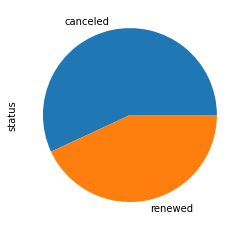

In [52]:
tv_shows_canceled_sample.status.value_counts().plot(kind='pie')

In [53]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import optuna
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [54]:
x_tvshows = tv_shows_canceled_sample.drop('status', axis=1)
y_tvshows = tv_shows_canceled_sample['status']
Xtrain, Xtest, ytrain, ytest = train_test_split(x_tvshows, y_tvshows, random_state=1)
# tv_shows_canceled_sample.info()

In [55]:
def show_confusion_matrix (model):
    model.fit(Xtrain, ytrain)
    ypred_train = model.predict(Xtrain)
    y_model = model.predict(Xtest)

    print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
    print("ACC TEST:" + str(accuracy_score(ytest, y_model)))

    labels = ['not_canceled', 'canceled']
    mat = confusion_matrix(ytest, y_model, labels=labels)
    sns.heatmap(mat, square=True, annot=True, cbar=False, xticklabels=labels, yticklabels=labels)
    # mat = confusion_matrix(ytest, y_model, labels=['renewed', 'canceled', 'end'])
    # sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value')


## KNN

In [56]:
def objective(trial):
    # hyperparameter setting
    n_neighbors = trial.suggest_int('n_neighbors', 1, 200)
    
    # model training and evaluation
    model =  KNeighborsClassifier( n_neighbors=n_neighbors)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    acc = accuracy_score(ytest, y_pred)

    # output: evaluation score
    return acc

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective, n_trials=20)


[I 2020-11-12 14:45:53,380] A new study created in memory with name: no-name-a34e5f01-dc8a-4f5a-a637-b993fe547e08
[I 2020-11-12 14:45:53,513] Trial 0 finished with value: 0.6987577639751553 and parameters: {'n_neighbors': 154}. Best is trial 0 with value: 0.6987577639751553.
[I 2020-11-12 14:45:53,586] Trial 1 finished with value: 0.6739130434782609 and parameters: {'n_neighbors': 176}. Best is trial 0 with value: 0.6987577639751553.
[I 2020-11-12 14:45:53,661] Trial 2 finished with value: 0.6925465838509317 and parameters: {'n_neighbors': 170}. Best is trial 0 with value: 0.6987577639751553.
[I 2020-11-12 14:45:53,718] Trial 3 finished with value: 0.6956521739130435 and parameters: {'n_neighbors': 41}. Best is trial 0 with value: 0.6987577639751553.
[I 2020-11-12 14:45:53,761] Trial 4 finished with value: 0.6801242236024845 and parameters: {'n_neighbors': 2}. Best is trial 0 with value: 0.6987577639751553.
[I 2020-11-12 14:45:53,807] Trial 5 finished with value: 0.6956521739130435 and

ACC TRAINING:0.7184265010351967
ACC TEST:0.7267080745341615


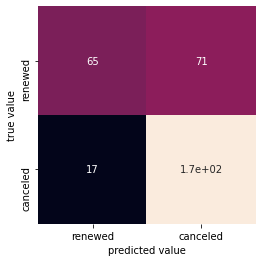

In [57]:
show_confusion_matrix(KNeighborsClassifier(**study_knn.best_params))

In [58]:
# KNeighborsClassifier(**study_knn.best_params)
n_neighbors = 71

# model training and evaluation
model =  KNeighborsClassifier( n_neighbors=n_neighbors)
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
acc = accuracy_score(ytest, y_pred)
# f = f1_score(ytest, y_pred, average='binary')

## Random Forest

In [59]:
classifier_rf = RandomForestClassifier(random_state=200,
                           max_depth=10,
                           n_estimators=50)
scores_rf = cross_val_score(classifier_rf, x_tvshows, y_tvshows,
                            scoring='accuracy', cv=5)

print(scores_rf.mean())

0.7321449039302628


In [60]:
def objective(trial):
    # hyperparameter setting
    max_depth = trial.suggest_int('max_depth', 3, 1000)
    random_state = trial.suggest_int('random_state', 0, 1000)
    n_estimators = trial.suggest_int('n_estimators', 1, 200)
    
    # model training and evaluation
    model =  RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    acc = accuracy_score(ytest, y_pred)

    # output: evaluation score
    return acc

study_randomforest = optuna.create_study(direction='maximize')
study_randomforest.optimize(objective, n_trials=20)

[I 2020-11-12 14:45:55,988] A new study created in memory with name: no-name-aa414411-2b6a-4d38-bb8d-fb1da1a4ec0a
[I 2020-11-12 14:45:56,031] Trial 0 finished with value: 0.7298136645962733 and parameters: {'max_depth': 366, 'random_state': 634, 'n_estimators': 12}. Best is trial 0 with value: 0.7298136645962733.
[I 2020-11-12 14:45:56,223] Trial 1 finished with value: 0.7484472049689441 and parameters: {'max_depth': 692, 'random_state': 180, 'n_estimators': 58}. Best is trial 1 with value: 0.7484472049689441.
[I 2020-11-12 14:45:56,623] Trial 2 finished with value: 0.7701863354037267 and parameters: {'max_depth': 571, 'random_state': 729, 'n_estimators': 159}. Best is trial 2 with value: 0.7701863354037267.
[I 2020-11-12 14:45:56,744] Trial 3 finished with value: 0.7236024844720497 and parameters: {'max_depth': 69, 'random_state': 122, 'n_estimators': 21}. Best is trial 2 with value: 0.7701863354037267.
[I 2020-11-12 14:45:57,117] Trial 4 finished with value: 0.7546583850931677 and pa

ACC TRAINING:1.0
ACC TEST:0.7763975155279503


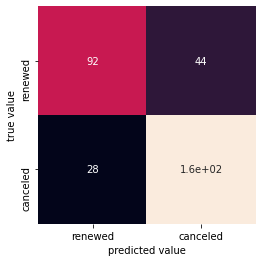

In [61]:
show_confusion_matrix(RandomForestClassifier(**study_randomforest.best_params))

## Naive Bayes

ACC TRAINING:0.6583850931677019
ACC TEST:0.6521739130434783


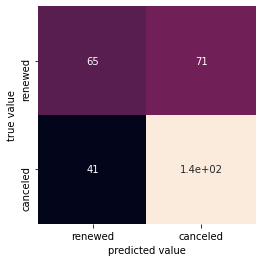

In [62]:
show_confusion_matrix(GaussianNB())

## Decision Tree

In [63]:
def objective(trial):
    # hyperparameter setting
    max_depth = trial.suggest_int('max_depth', 3, 1000)
    random_state = trial.suggest_int('max_depth', 0, 1000)
    
    # model training and evaluation
    model = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    acc = accuracy_score(ytest, y_pred)

    # output: evaluation score
    return acc

study_decisiontree = optuna.create_study(direction='maximize')
study_decisiontree.optimize(objective, n_trials=20)

[I 2020-11-12 14:46:02,938] A new study created in memory with name: no-name-5d8c7cc9-123e-41fc-a524-c50919bde376
[I 2020-11-12 14:46:02,954] Trial 0 finished with value: 0.6987577639751553 and parameters: {'max_depth': 244}. Best is trial 0 with value: 0.6987577639751553.
[I 2020-11-12 14:46:02,974] Trial 1 finished with value: 0.7049689440993789 and parameters: {'max_depth': 766}. Best is trial 1 with value: 0.7049689440993789.
[I 2020-11-12 14:46:02,991] Trial 2 finished with value: 0.7236024844720497 and parameters: {'max_depth': 278}. Best is trial 2 with value: 0.7236024844720497.
[I 2020-11-12 14:46:03,010] Trial 3 finished with value: 0.7391304347826086 and parameters: {'max_depth': 155}. Best is trial 3 with value: 0.7391304347826086.
[I 2020-11-12 14:46:03,028] Trial 4 finished with value: 0.717391304347826 and parameters: {'max_depth': 808}. Best is trial 3 with value: 0.7391304347826086.
[I 2020-11-12 14:46:03,049] Trial 5 finished with value: 0.6925465838509317 and paramet

ACC TRAINING:1.0
ACC TEST:0.7111801242236024


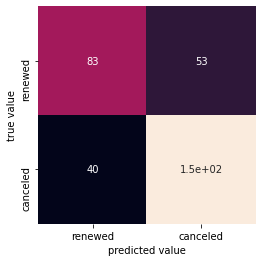

In [64]:
show_confusion_matrix(sklearn.tree.DecisionTreeClassifier(**study_decisiontree.best_params))